# Part II - Trend of Bike Sharing Data
## by KhoiVN

## Investigation Overview
> The goal of this presentation is to show the trend of bike sharing data in February 2019. The main focus is on the trip duration, the information of users, and the number of trips by user type.

## Dataset Overview

> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data consists of 183,412 rows and 16 columns. The attributes included the trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, bike share for all trip, and rental access method. The dataset can be downloaded from [here](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
df_new = df.copy()
df_new.dropna(inplace=True)
# Wrong data type
df_new['start_station_id'] = df_new['start_station_id'].astype('int64')
df_new['end_station_id'] = df_new['end_station_id'].astype('int64')

df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

df_new['user_type'] = df_new['user_type'].astype('category')
df_new['member_birth_year'] = df_new['member_birth_year'].astype('int64')
df_new['member_gender'] = df_new['member_gender'].astype('category')
df_new['bike_share_for_all_trip'] = df_new['bike_share_for_all_trip'].astype('category')

# Feature Engineering
df_new['member_age'] = 2019 - df_new['member_birth_year']
df_new['start_date'] = df_new['start_time'].dt.strftime('%Y-%m-%d')
df_new['start_hour'] = df_new['start_time'].dt.strftime('%H')
df_new['start_day'] = df_new['start_time'].dt.strftime('%A')
df_new['start_month'] = df_new['start_time'].dt.strftime('%B')
df_new['end_date'] = df_new['end_time'].dt.strftime('%Y-%m-%d')
df_new['end_hour'] = df_new['end_time'].dt.strftime('%H')
df_new['end_day'] = df_new['end_time'].dt.strftime('%A')
df_new['end_month'] = df_new['end_time'].dt.strftime('%B')

In [4]:
df_new.shape

(174952, 25)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Bike Share for all trips

Question: What is the distribution of bike share for all trips?

> The raw dataset has 183412 rows and 16 columns and has many non values in some columns. After cleaning the dataset, the dataset has 174952 rows and 25 columns. There are about 16000 users not share bike for all trips, which is about 90% of the total users. Other 10% users share bike for all trips.

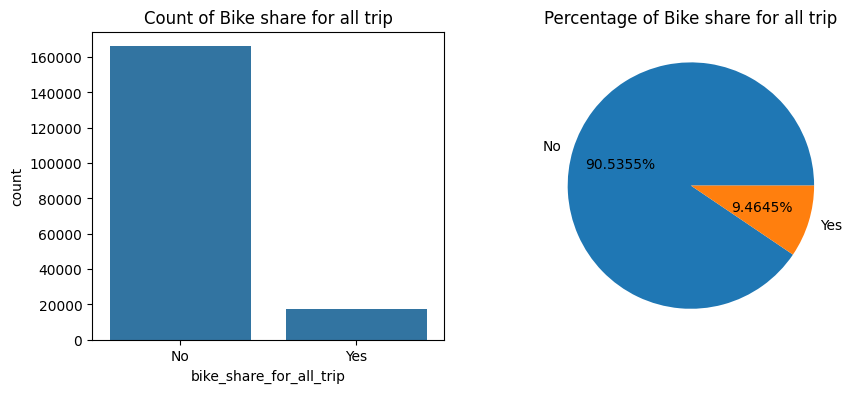

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].set_title('Count of Bike share for all trip')
sb.countplot(x=df['bike_share_for_all_trip'], ax=ax[0]);
ax[1].set_title('Percentage of Bike share for all trip')
ax[1].pie(df['bike_share_for_all_trip'].value_counts(), labels=['No', 'Yes'], autopct='%1.4f%%');

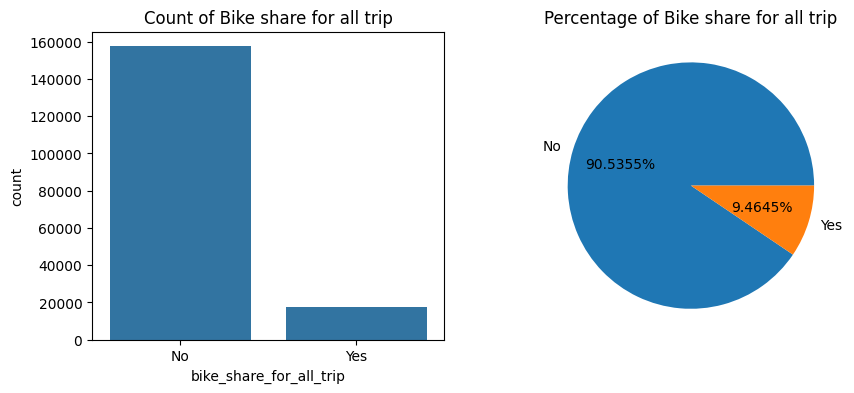

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].set_title('Count of Bike share for all trip')
sb.countplot(x=df_new['bike_share_for_all_trip'], ax=ax[0]);
ax[1].set_title('Percentage of Bike share for all trip')
ax[1].pie(df['bike_share_for_all_trip'].value_counts(), labels=['No', 'Yes'], autopct='%1.4f%%');

## Day Usage of Bike Share

Question: What days does the use of bike sharing services usually take place?

> Almost all users use bike sharing services on weekdays, and the number of users using bike sharing services on weekends is a half. The number of users using bike sharing services on Thursday is the largest, and the number of users using bike sharing services on Saturday is the smallest. So we should enhance more bikes on Thursday and provide more discounts on Saturday.

In [ ]:
def plot_chart(df, x, y=None, hue=None, type="bar", title=None, xlabel=None, ylabel=None, xticks=None, yticks=None):
    if type == "bar":
        sb.barplot(x=x, y=y, data=df)
    elif type == "line":
        sb.lineplot(x=x, y=y, data=df)
    elif type == "pie":
        plt.pie(df[y], labels=df[x], autopct='%1.1f%%')
    elif type == "count":
        sb.countplot(x=x, y=y, hue=hue, data=df)
    elif type == "scatter":
        sb.scatterplot(x=x, y=y, data=df)
    elif type == "box":
        sb.boxplot(x=x, y=y, data=df)
    elif type == "violin":
        sb.violinplot(x=x, y=y, hue=hue, data=df)
    elif type == "hist":
        plt.hist(x=x, data=df, bins=200)
    elif type =="reg":
        sb.regplot(x=x, y=y, data=df)
    else:
        raise Exception("Invalid type")
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel=ylabel)
    plt.title(label=title)
    if xticks:
        plt.xticks(ticks=xticks, labels=[str(x) for x in xticks])
        plt.xscale('log')
    if yticks:
        plt.yticks(ticks=yticks, labels=[str(y) for y in yticks])
        plt.yscale('log')
    plt.show()

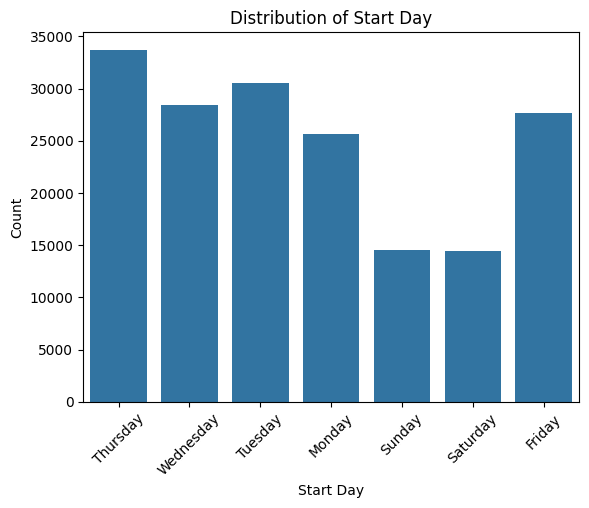

In [7]:
plot_chart(df_new, 'start_day', type='count', title='Count Distribution of Start Day', xlabel='Start Day', ylabel='Count')

## Average Age, Gender of Bike Share Users

Question: What is user trends when using shared bikes?

> The average age of users using bike sharing services is 30 years old and almost of them are male. It's easy to understand younger people are more likely to use bike sharing services. So we should enhance more bikes in the area where young people live and work.

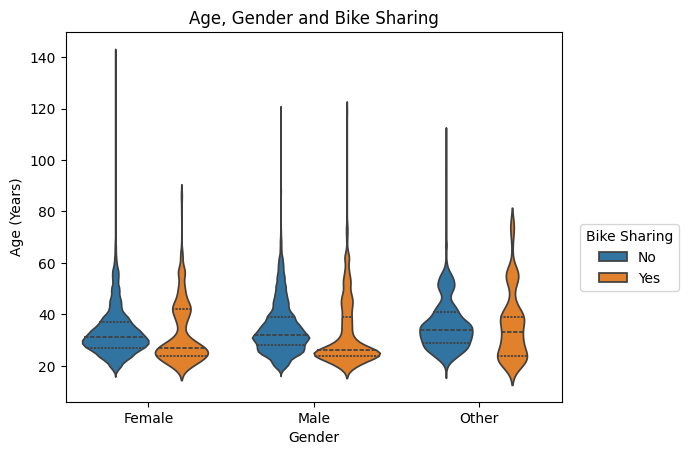

In [8]:
plot_chart(df=df, x='member_gender', y='member_age', hue='bike_share_for_all_trip', type='violin', title='Violint plot between Start Hour and Duration', xlabel='Start Hour', ylabel='Duration (Seconds)')

## Conclusion

To sum up, almost users who share bike for all trips are `Male` between `20-40` years old. The duration of the trip is inversely related to the age. The younger the user, the longer the trip. The ratio of `customer` and `subscriber` is the same for all ages. The most common periods of the day when trips start are 7-9 am and 4-6 pm. Users use the bike more on weekdays than weekends. `San Francisco Caltrain (Townsend St at 4th St)` and `Market St at 10th St` are the most popular stations for starting and ending trips. The percentage of using bike share for all trip is 10.1%.

In [9]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 470830 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/Users/macos/miniconda3/envs/da-c1/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
  File "/Users/macos/miniconda3/envs/da-c1/lib/python3.8/site-packages/jupyter_core/application.py", line 280, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/Users/macos/miniconda3/envs/da-c1/lib/python3.8/site-packages/traitlets/config/application.py", line 1053, in launch_instance
    app.start()
  File "/Users/macos/miniconda3/envs/da-c1/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 412, in start
    self.convert_notebooks()
  File "/Users/macos/miniconda3/envs/da-c1/lib/py